## Mini-proyecto: Procesamiento  y análisis de datos con PySpark
**Integrantes**
+ José David Vázquez Rojas
+ Luis Fernando Flores Tiburcio
+ Hugo Carlos Morán Peraza



Primero Instalamos las dependencias de Spark en la sesión de la maquina virtual y las librerias que necesitaremos.

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
# Carga funciones extra
from pyspark.sql.functions import * 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MapReduce').getOrCreate()

     |████████████████████████████████| 212.3MB 69kB/s 
     |████████████████████████████████| 204kB 42.2MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Procesamiento del lenguaje natural
!pip install nltk
!pip install --upgrade pip
!python -m nltk.downloader all
import nltk
import string
nltk.download('twitter_samples')
# Experimental?
!pip install sentiment-analysis-spanish
!pip install keras tensorflow
from sentiment_analysis_spanish import sentiment_analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /roo

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Base de datos

La base de datos estará conformada de una colección de 20,000 tweets. Esta colección sera obtenida de la librería "nltk". Importamos los datos y las herramientas que usaremos para su procesado. 

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import twitter_samples 
from nltk.tokenize import word_tokenize  
nltk.download('twitter_samples')
tweets = twitter_samples.strings('tweets.20150430-223406.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [ ]:
len(tweets)

20000

## Procesado del Corpus

Crearemos una función para procesar los tweets obtenidos. Con esta función quitaremos los caracteres no deseados, quiateremos las "stop words" y tokenizaremos cada uno de los tweets.

In [ ]:
def process_tweet(tweet):
    """
    Input:
        tweet: una cadena conteniendo un tweet
    Output:
        tweets_clean: una lista de palabras conteniendo el tweet ya procesado

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'[^a-zA-Z0-9 ]','', tweet)  
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation):  
            
            stem_word = stemmer.stem(word) 
            tweets_clean.append(stem_word)

    return tweets_clean
procesado=list(map(process_tweet,tweets))
procesado


[['kirkku',
  'indirect',
  'cost',
  'uk',
  'eu',
  'estim',
  'cost',
  'britain',
  '170',
  'billion',
  'per',
  'year',
  'betteroffout',
  'ukip'],
 ['video', 'sturgeon', 'postelect', 'deal'],
 ['laboureoin',
  'economi',
  'grow',
  '3',
  'time',
  'faster',
  'day',
  'david',
  'cameron',
  'becam',
  'prime',
  'minist',
  'today',
  'bbcqt'],
 ['greglaud',
  'ukip',
  'east',
  'lothian',
  'candid',
  'look',
  '16',
  'still',
  'msn',
  'addi'],
 ['thesundaypeopl',
  'ukip',
  'hous',
  'spokesman',
  'rake',
  '800k',
  'hous',
  'benefit',
  'migrant'],
 ['nigelfarag',
  'make',
  'sure',
  'tune',
  'asknigelfarag',
  'tonight',
  'bbc',
  '1',
  '2250',
  'ukip'],
 ['joannet',
  'ed',
  'milliband',
  'embarrass',
  'would',
  'want',
  'repres',
  'uk',
  'bbcqt',
  'vote',
  'conserv'],
 ['abstex',
  'ft',
  'back',
  'tori',
  'unrel',
  'note',
  'here',
  'photo',
  'ft',
  'leader',
  'writer',
  'jonathan',
  'ford',
  'next',
  'bori'],
 ['nivenj',
  '1',
 

##Actividad 1 Frecuencias Ngramas
Hacemos el mapeo de las palabras filtradas y contabilizamos sus frecuencias en todos los tweets



#### Por Palabra

In [ ]:
rdd_tweets = spark.sparkContext.parallelize(procesado)

In [ ]:
rdd_palabras = rdd_tweets.flatMap(lambda parrafo: parrafo)

In [ ]:
histograma_palabras = rdd_palabras.map(lambda palabra: (palabra, 1)) \
                                  .reduceByKey(lambda a, b: a + b) \
                                  .sortBy(lambda x: x[1], ascending = False) \
                                  .collect()
print ("{:<10} {:<10}".format('PALABRA', 'FRECUENCIA'))
for palabra, frecuencia in histograma_palabras:
  print ("{:<10} {:<10}".format(palabra, frecuencia))
  

Se truncaron las últimas líneas 5000 del resultado de transmisión.
selfsaboteur 1         
dnt        1         
groundwork 1         
391956     1         
anthonystarr 1         
guitarwizard 1         
sampbang   1         
boycottworkfar 1         
pmq        1         
mrbolo     1         
turnip     1         
jamesgethin 1         
overspendmiliband 1         
notel      1         
letshugbro 1         
westmist   1         
deedeegi   1         
ukbut      1         
abroadjonsnowc 1         
ajrepton   1         
sexism     1         
jewishcampsusa 1         
wazmcr     1         
bbcat      1         
ryandawson 1         
fingoldcf  1         
jimp       1         
7551       1         
shithead   1         
inconsist  1         
interviewpleas 1         
danlthorp  1         
cliveefford 1         
eltham     1         
plumstead  1         
masquerad  1         
maw        1         
faragelub  1         
oddscheck  1         
813        1         
wildest    1         


In [ ]:
histograma_palabras=histograma_palabras[:100]
for palabra, frecuencia in histograma_palabras:
  print ("{:<10} {:<10}".format(palabra, frecuencia))

tori       5911      
miliband   5582      
snp        5230      
ukip       3486      
labour     2919      
ed         2791      
cameron    2627      
bbcqt      2506      
vote       2056      
farag      2016      
say        1699      
david      1654      
rather     1536      
deal       1445      
let        1437      
work       1362      
time       1361      
would      1354      
support    1185      
asknigelfarag 1129      
tonight    1126      
amp        1085      
go         1065      
http       1053      
clegg      992       
leader     987       
nigel      976       
scotland   946       
peopl      888       
get        885       
come       885       
claim      850       
want       848       
question   842       
w          786       
man        784       
need       761       
mp         760       
nigelfarag 740       
back       738       
im         732       
like       732       
edmiliband 709       
dont       705       
1          688       
nicolas

Ahora creamos el histograma con las frecuencias anteriores. 

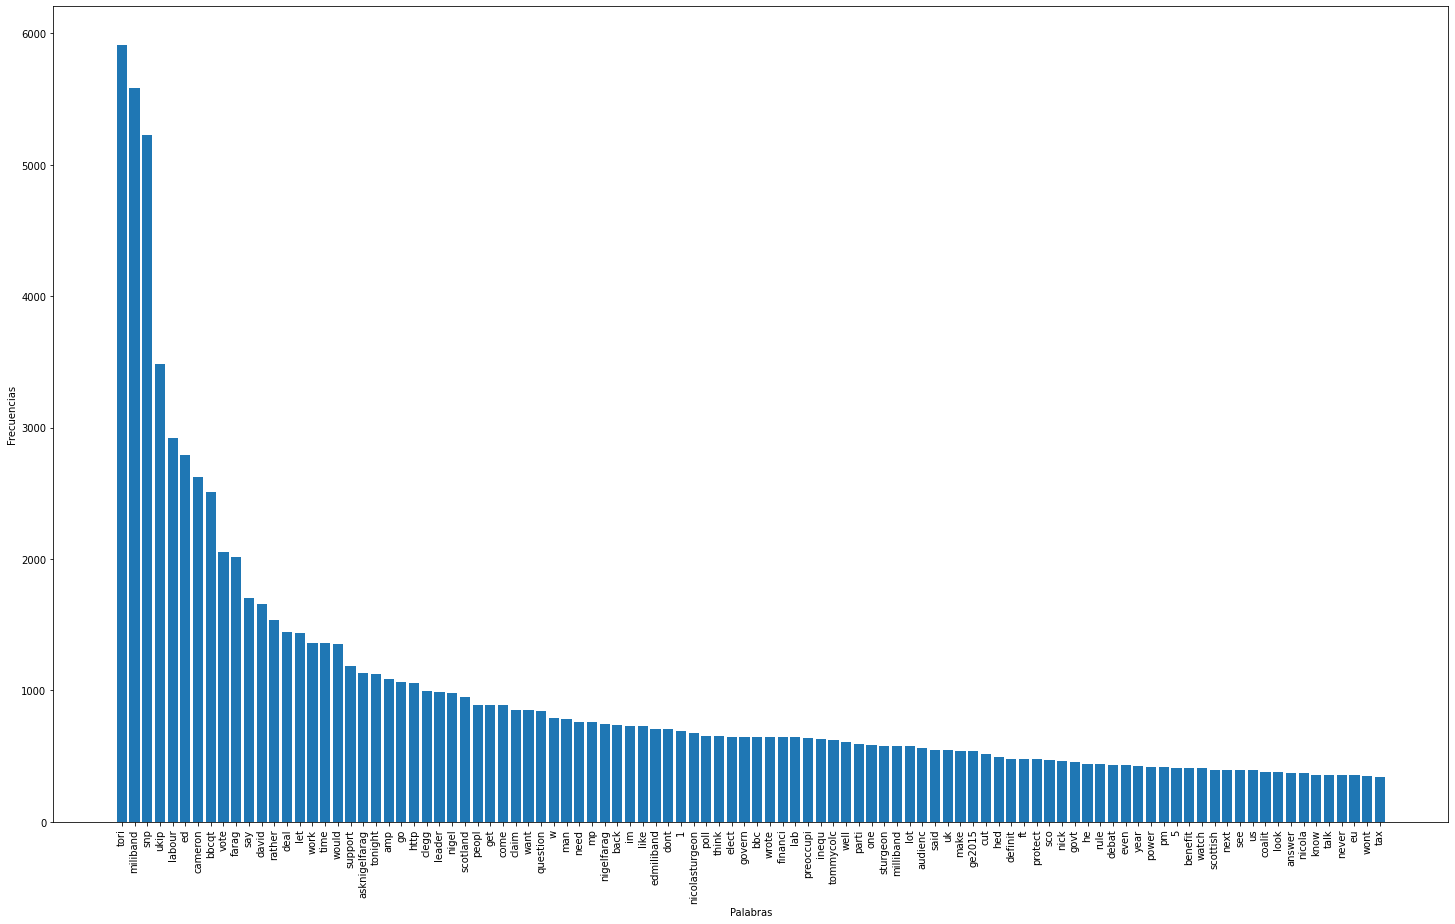

In [ ]:
import matplotlib.pyplot as plt
palabra = [ palabra for (palabra, _) in histograma_palabras]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_palabras ]
plt.figure(figsize=(25, 15))
plt.bar(palabra, frecuencias)
plt.xlabel('Palabras')
plt.ylabel('Frecuencias')
plt.xticks(rotation =90)
plt.show()

#### Por Bigrama

Crearemos primero una función que nos generará los n-gramas, para posteriormente aplicarla a los bigramas y trigramas. Una vez obtenidos los elementos anteriores aplicamos la técnica usada en la sección anterior.

In [ ]:
def Ngrama(palabras,n):
  Ngramas=[]
  for i in range(len(palabras)-n+1):
    ngrama=palabras[i:i+n]
    Ngramas.append(tuple(ngrama))
  return Ngramas

In [ ]:
bigrama=Ngrama(list(rdd_palabras.collect()),2)
bigrama

[('kirkku', 'indirect'),
 ('indirect', 'cost'),
 ('cost', 'uk'),
 ('uk', 'eu'),
 ('eu', 'estim'),
 ('estim', 'cost'),
 ('cost', 'britain'),
 ('britain', '170'),
 ('170', 'billion'),
 ('billion', 'per'),
 ('per', 'year'),
 ('year', 'betteroffout'),
 ('betteroffout', 'ukip'),
 ('ukip', 'video'),
 ('video', 'sturgeon'),
 ('sturgeon', 'postelect'),
 ('postelect', 'deal'),
 ('deal', 'laboureoin'),
 ('laboureoin', 'economi'),
 ('economi', 'grow'),
 ('grow', '3'),
 ('3', 'time'),
 ('time', 'faster'),
 ('faster', 'day'),
 ('day', 'david'),
 ('david', 'cameron'),
 ('cameron', 'becam'),
 ('becam', 'prime'),
 ('prime', 'minist'),
 ('minist', 'today'),
 ('today', 'bbcqt'),
 ('bbcqt', 'greglaud'),
 ('greglaud', 'ukip'),
 ('ukip', 'east'),
 ('east', 'lothian'),
 ('lothian', 'candid'),
 ('candid', 'look'),
 ('look', '16'),
 ('16', 'still'),
 ('still', 'msn'),
 ('msn', 'addi'),
 ('addi', 'thesundaypeopl'),
 ('thesundaypeopl', 'ukip'),
 ('ukip', 'hous'),
 ('hous', 'spokesman'),
 ('spokesman', 'rake'),


In [ ]:
bigramas=[]
for i,j in bigrama:
  bigramas.append(f'({i},{j})')
bigramas

['(kirkku,indirect)',
 '(indirect,cost)',
 '(cost,uk)',
 '(uk,eu)',
 '(eu,estim)',
 '(estim,cost)',
 '(cost,britain)',
 '(britain,170)',
 '(170,billion)',
 '(billion,per)',
 '(per,year)',
 '(year,betteroffout)',
 '(betteroffout,ukip)',
 '(ukip,video)',
 '(video,sturgeon)',
 '(sturgeon,postelect)',
 '(postelect,deal)',
 '(deal,laboureoin)',
 '(laboureoin,economi)',
 '(economi,grow)',
 '(grow,3)',
 '(3,time)',
 '(time,faster)',
 '(faster,day)',
 '(day,david)',
 '(david,cameron)',
 '(cameron,becam)',
 '(becam,prime)',
 '(prime,minist)',
 '(minist,today)',
 '(today,bbcqt)',
 '(bbcqt,greglaud)',
 '(greglaud,ukip)',
 '(ukip,east)',
 '(east,lothian)',
 '(lothian,candid)',
 '(candid,look)',
 '(look,16)',
 '(16,still)',
 '(still,msn)',
 '(msn,addi)',
 '(addi,thesundaypeopl)',
 '(thesundaypeopl,ukip)',
 '(ukip,hous)',
 '(hous,spokesman)',
 '(spokesman,rake)',
 '(rake,800k)',
 '(800k,hous)',
 '(hous,benefit)',
 '(benefit,migrant)',
 '(migrant,nigelfarag)',
 '(nigelfarag,make)',
 '(make,sure)',
 '

In [ ]:
rdd_tweets_bigramas = spark.sparkContext.parallelize(bigramas)

In [ ]:
histograma_palabras_bigramas = rdd_tweets_bigramas.map(lambda palabra: (palabra, 1)) \
                                  .reduceByKey(lambda a, b: a + b) \
                                  .sortBy(lambda x: x[1], ascending = False) \
                                  .collect()
print ("{:<10} {:<10}".format('PALABRA', 'FRECUENCIA'))
for palabra, frecuencia in histograma_palabras_bigramas:
  print ("{:<10} {:<10}".format(palabra, frecuencia))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(feet,bbcpolit) 1         
(11yearold,would) 1         
(free,school) 1         
(dem,ge2015) 1         
(ge2015,plan) 1         
(plan,say) 1         
(clegg,labouroutofscot) 1         
(question,legitimaci) 1         
(legitimaci,snp) 1         
(condon,right) 1         
(w,retweet) 1         
(insubscrib,brynteilo) 1         
(bbcqt,davidwilson) 1         
(davidwilson,80) 1         
(80,jamieross) 1         
(would,side) 1         
(tv,aameranwar) 1         
(south,hudsonbth) 1         
(like,answer) 1         
(answer,least) 1         
(isnt,afraid) 1         
(afraid,give) 1         
(give,unlik) 1         
(askthelead,karrenbradi) 1         
(let,c)    1         
(labour,gwydion) 1         
(sturdyalex,final) 1         
(forget,thou) 1         
(rai,angusmacneilsnp) 1         
(ukip,richardhowitt) 1         
(yioffici,absolut) 1         
(brown,fair) 1         
(question,jim) 1         
(slab,wouldnt) 1         


In [ ]:
histograma_palabras_bigramas=histograma_palabras_bigramas[:100]

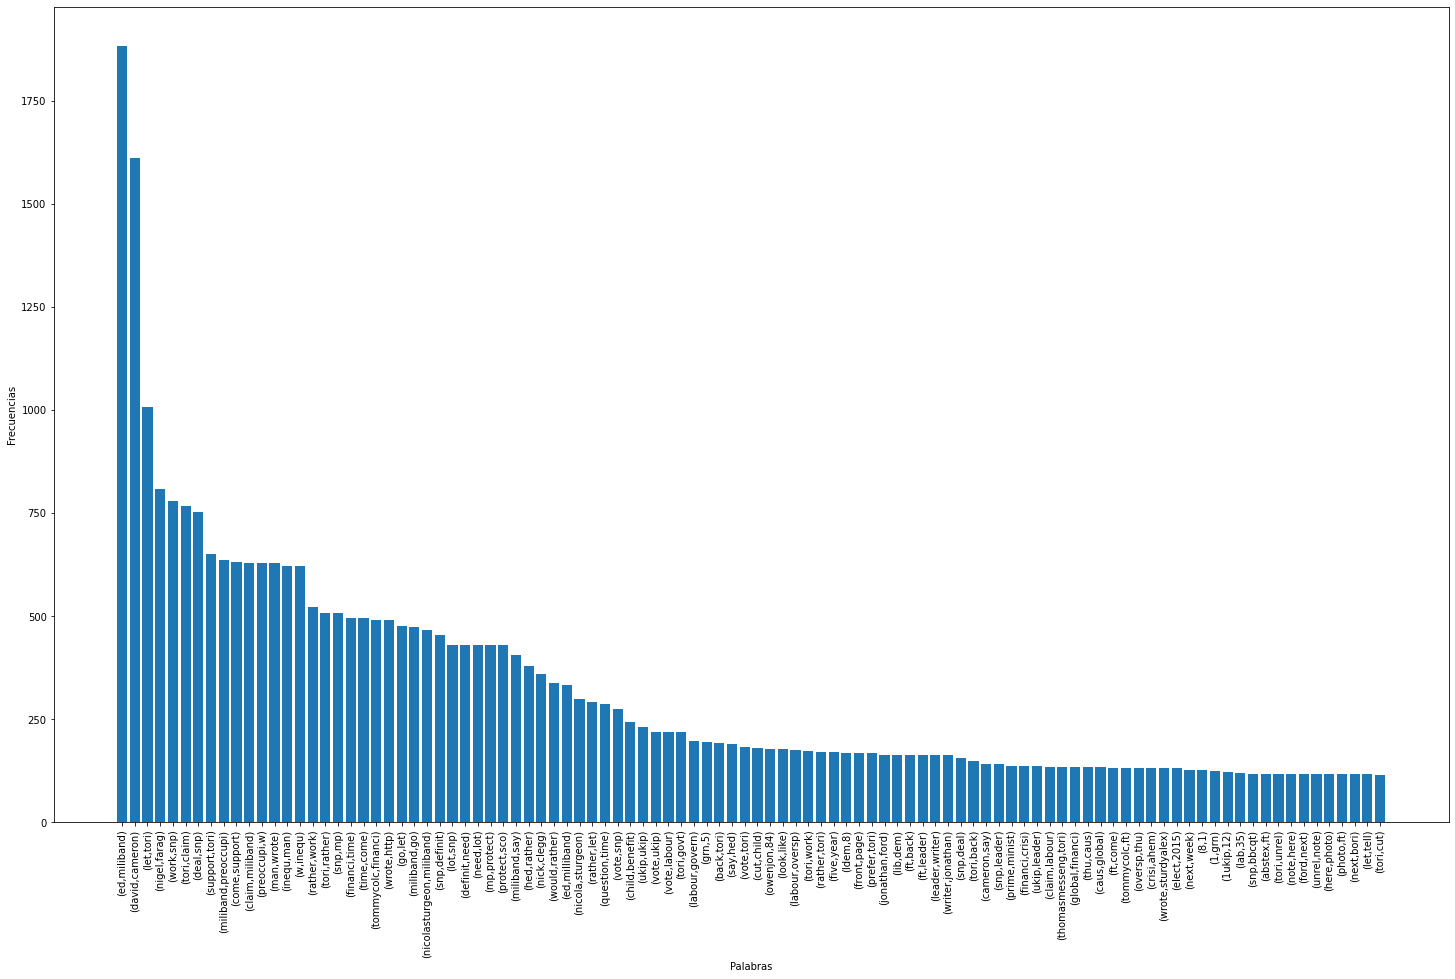

In [ ]:
import matplotlib.pyplot as plt
palabra = [ palabra for (palabra, _) in histograma_palabras_bigramas]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_palabras_bigramas ]
plt.figure(figsize=(25, 15))
plt.bar(palabra, frecuencias)
plt.xlabel('Palabras')
plt.ylabel('Frecuencias')
plt.xticks(rotation =90)
plt.show()

#### Por trigrama

In [ ]:
trigrama=Ngrama(list(rdd_palabras.collect()),n=3)
trigrama

[('kirkku', 'indirect', 'cost'),
 ('indirect', 'cost', 'uk'),
 ('cost', 'uk', 'eu'),
 ('uk', 'eu', 'estim'),
 ('eu', 'estim', 'cost'),
 ('estim', 'cost', 'britain'),
 ('cost', 'britain', '170'),
 ('britain', '170', 'billion'),
 ('170', 'billion', 'per'),
 ('billion', 'per', 'year'),
 ('per', 'year', 'betteroffout'),
 ('year', 'betteroffout', 'ukip'),
 ('betteroffout', 'ukip', 'video'),
 ('ukip', 'video', 'sturgeon'),
 ('video', 'sturgeon', 'postelect'),
 ('sturgeon', 'postelect', 'deal'),
 ('postelect', 'deal', 'laboureoin'),
 ('deal', 'laboureoin', 'economi'),
 ('laboureoin', 'economi', 'grow'),
 ('economi', 'grow', '3'),
 ('grow', '3', 'time'),
 ('3', 'time', 'faster'),
 ('time', 'faster', 'day'),
 ('faster', 'day', 'david'),
 ('day', 'david', 'cameron'),
 ('david', 'cameron', 'becam'),
 ('cameron', 'becam', 'prime'),
 ('becam', 'prime', 'minist'),
 ('prime', 'minist', 'today'),
 ('minist', 'today', 'bbcqt'),
 ('today', 'bbcqt', 'greglaud'),
 ('bbcqt', 'greglaud', 'ukip'),
 ('greglau

In [ ]:
trigramas=[]
for i,j,k in trigrama:
  trigramas.append(f'({i},{j},{k})')
trigramas

['(kirkku,indirect,cost)',
 '(indirect,cost,uk)',
 '(cost,uk,eu)',
 '(uk,eu,estim)',
 '(eu,estim,cost)',
 '(estim,cost,britain)',
 '(cost,britain,170)',
 '(britain,170,billion)',
 '(170,billion,per)',
 '(billion,per,year)',
 '(per,year,betteroffout)',
 '(year,betteroffout,ukip)',
 '(betteroffout,ukip,video)',
 '(ukip,video,sturgeon)',
 '(video,sturgeon,postelect)',
 '(sturgeon,postelect,deal)',
 '(postelect,deal,laboureoin)',
 '(deal,laboureoin,economi)',
 '(laboureoin,economi,grow)',
 '(economi,grow,3)',
 '(grow,3,time)',
 '(3,time,faster)',
 '(time,faster,day)',
 '(faster,day,david)',
 '(day,david,cameron)',
 '(david,cameron,becam)',
 '(cameron,becam,prime)',
 '(becam,prime,minist)',
 '(prime,minist,today)',
 '(minist,today,bbcqt)',
 '(today,bbcqt,greglaud)',
 '(bbcqt,greglaud,ukip)',
 '(greglaud,ukip,east)',
 '(ukip,east,lothian)',
 '(east,lothian,candid)',
 '(lothian,candid,look)',
 '(candid,look,16)',
 '(look,16,still)',
 '(16,still,msn)',
 '(still,msn,addi)',
 '(msn,addi,thesunda

In [ ]:
rdd_tweets_trigramas = spark.sparkContext.parallelize(trigramas)
histograma_palabras_trigramas = rdd_tweets_trigramas.map(lambda palabra: (palabra, 1)) \
                                  .reduceByKey(lambda a, b: a + b) \
                                  .sortBy(lambda x: x[1], ascending = False) \
                                  .collect()
print ("{:<10} {:<10}".format('PALABRA', 'FRECUENCIA'))
for palabra, frecuencia in histograma_palabras_trigramas:
  print ("{:<10} {:<10}".format(palabra, frecuencia))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(histor,landmark,border) 1         
(landmark,border,defac) 1         
(tori,sign,hulbertmathew) 1         
(sign,hulbertmathew,nigel) 1         
(trip,upbbcqt,minor) 1         
(upbbcqt,minor,govern) 1         
(tori,thesnp,ge2015) 1         
(session,ukip,russellhowhard) 1         
(wouldnt,tar,entir) 1         
(tar,entir,labour) 1         
(entir,labour,tori) 1         
(tori,parti,one) 1         
(one,murder,support) 1         
(polici,ukip,45storm) 1         
(ukip,45storm,angb) 1         
(angb,49,ye) 1         
(49,ye,site) 1         
(site,drink,whiskey) 1         
(milliband,besti,bet) 1         
(besti,bet,friendship) 1         
(bet,friendship,bracelet) 1         
(bracelet,shelaghwatt,scotnat) 1         
(snp,ge15,bfairfoul) 1         
(ge15,bfairfoul,stellar) 1         
(vote,ukip,mirrorpolit) 1         
(quit,correct,blaineallenn) 1         
(correct,blaineallenn,nigelfarag) 1         
(everyth,imvotinguk

In [ ]:
histograma_palabras_trigramas=histograma_palabras_trigramas[:100]

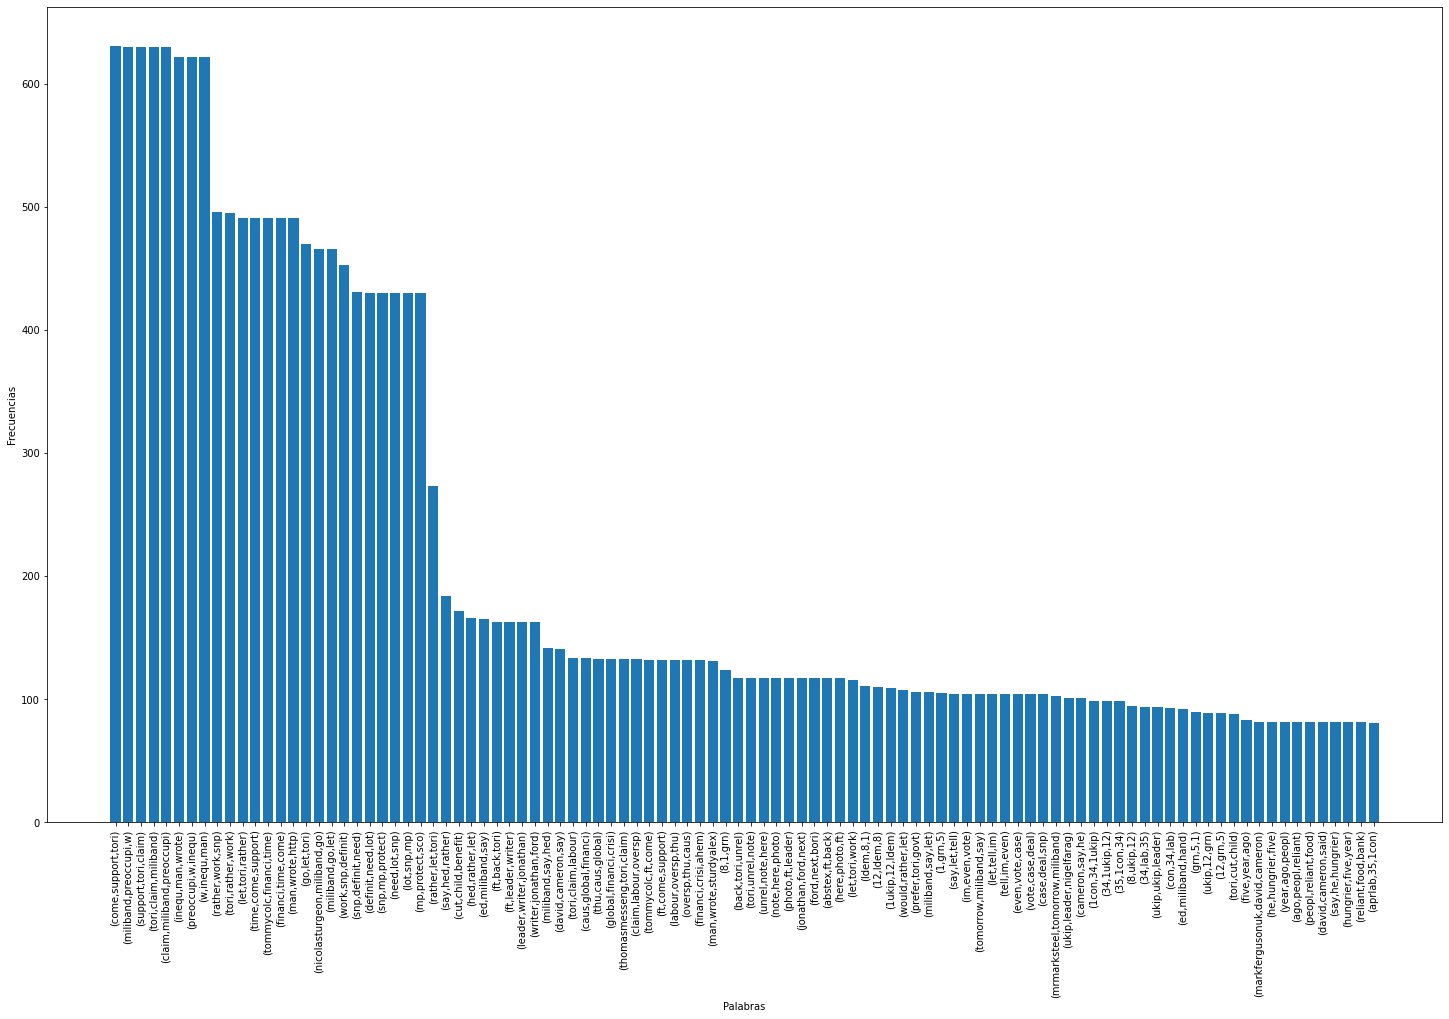

In [ ]:
import matplotlib.pyplot as plt
palabra = [ palabra for (palabra, _) in histograma_palabras_trigramas]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_palabras_trigramas ]
plt.figure(figsize=(25, 15))
plt.bar(palabra, frecuencias)
plt.xlabel('Palabras')
plt.ylabel('Frecuencias')
plt.xticks(rotation =90)
plt.show()

## Actividad 2 Frecuencia en documentos Ngramas
Contar el número de documentos en los que ocurre cada palabra, bigrama y trigrama.

#### Palabras

In [ ]:
rdd_tweets = spark.sparkContext.parallelize(procesado)
i=0
def indice(x):
  global i
  i+=1
  return (i,x)
rdd_tweetsPerron=rdd_tweets.map(lambda x: indice(x))

In [ ]:
rdd_tweetsPerron.collect()

[(1,
  ['kirkku',
   'indirect',
   'cost',
   'uk',
   'eu',
   'estim',
   'cost',
   'britain',
   '170',
   'billion',
   'per',
   'year',
   'betteroffout',
   'ukip']),
 (2, ['video', 'sturgeon', 'postelect', 'deal']),
 (3,
  ['laboureoin',
   'economi',
   'grow',
   '3',
   'time',
   'faster',
   'day',
   'david',
   'cameron',
   'becam',
   'prime',
   'minist',
   'today',
   'bbcqt']),
 (4,
  ['greglaud',
   'ukip',
   'east',
   'lothian',
   'candid',
   'look',
   '16',
   'still',
   'msn',
   'addi']),
 (5,
  ['thesundaypeopl',
   'ukip',
   'hous',
   'spokesman',
   'rake',
   '800k',
   'hous',
   'benefit',
   'migrant']),
 (6,
  ['nigelfarag',
   'make',
   'sure',
   'tune',
   'asknigelfarag',
   'tonight',
   'bbc',
   '1',
   '2250',
   'ukip']),
 (7,
  ['joannet',
   'ed',
   'milliband',
   'embarrass',
   'would',
   'want',
   'repres',
   'uk',
   'bbcqt',
   'vote',
   'conserv']),
 (8,
  ['abstex',
   'ft',
   'back',
   'tori',
   'unrel',
   'note'

In [ ]:
rdd_tweetsPerron.flatMap(lambda x: x).collect()

[1,
 ['kirkku',
  'indirect',
  'cost',
  'uk',
  'eu',
  'estim',
  'cost',
  'britain',
  '170',
  'billion',
  'per',
  'year',
  'betteroffout',
  'ukip'],
 2,
 ['video', 'sturgeon', 'postelect', 'deal'],
 3,
 ['laboureoin',
  'economi',
  'grow',
  '3',
  'time',
  'faster',
  'day',
  'david',
  'cameron',
  'becam',
  'prime',
  'minist',
  'today',
  'bbcqt'],
 4,
 ['greglaud',
  'ukip',
  'east',
  'lothian',
  'candid',
  'look',
  '16',
  'still',
  'msn',
  'addi'],
 5,
 ['thesundaypeopl',
  'ukip',
  'hous',
  'spokesman',
  'rake',
  '800k',
  'hous',
  'benefit',
  'migrant'],
 6,
 ['nigelfarag',
  'make',
  'sure',
  'tune',
  'asknigelfarag',
  'tonight',
  'bbc',
  '1',
  '2250',
  'ukip'],
 7,
 ['joannet',
  'ed',
  'milliband',
  'embarrass',
  'would',
  'want',
  'repres',
  'uk',
  'bbcqt',
  'vote',
  'conserv'],
 8,
 ['abstex',
  'ft',
  'back',
  'tori',
  'unrel',
  'note',
  'here',
  'photo',
  'ft',
  'leader',
  'writer',
  'jonathan',
  'ford',
  'next',

In [ ]:
rdd_palabras = rdd_tweetsPerron.map(lambda x: [(palabra, set([x[0]])) for palabra in x[1]]) \
                         .flatMap(lambda x: x) \
                         .reduceByKey(lambda a, b: a.union(b)) \
                         .sortBy(lambda x: len(x[1]), ascending = False)

print ("{:<10} {:<10}".format('PALABRA', 'FRECUENCIA'))                     
for x in rdd_palabras.take(10): #nos devuelve en cuantas opiniones aparece cada palabra pertenece cada palabra 
  print("{:<10} {:<10}".format(x[0], len(x[1])))

PALABRA    FRECUENCIA
tori       4945      
miliband   4819      
snp        3981      
ukip       2827      
labour     2547      
ed         2532      
cameron    2410      
bbcqt      2354      
farag      1916      
vote       1744      


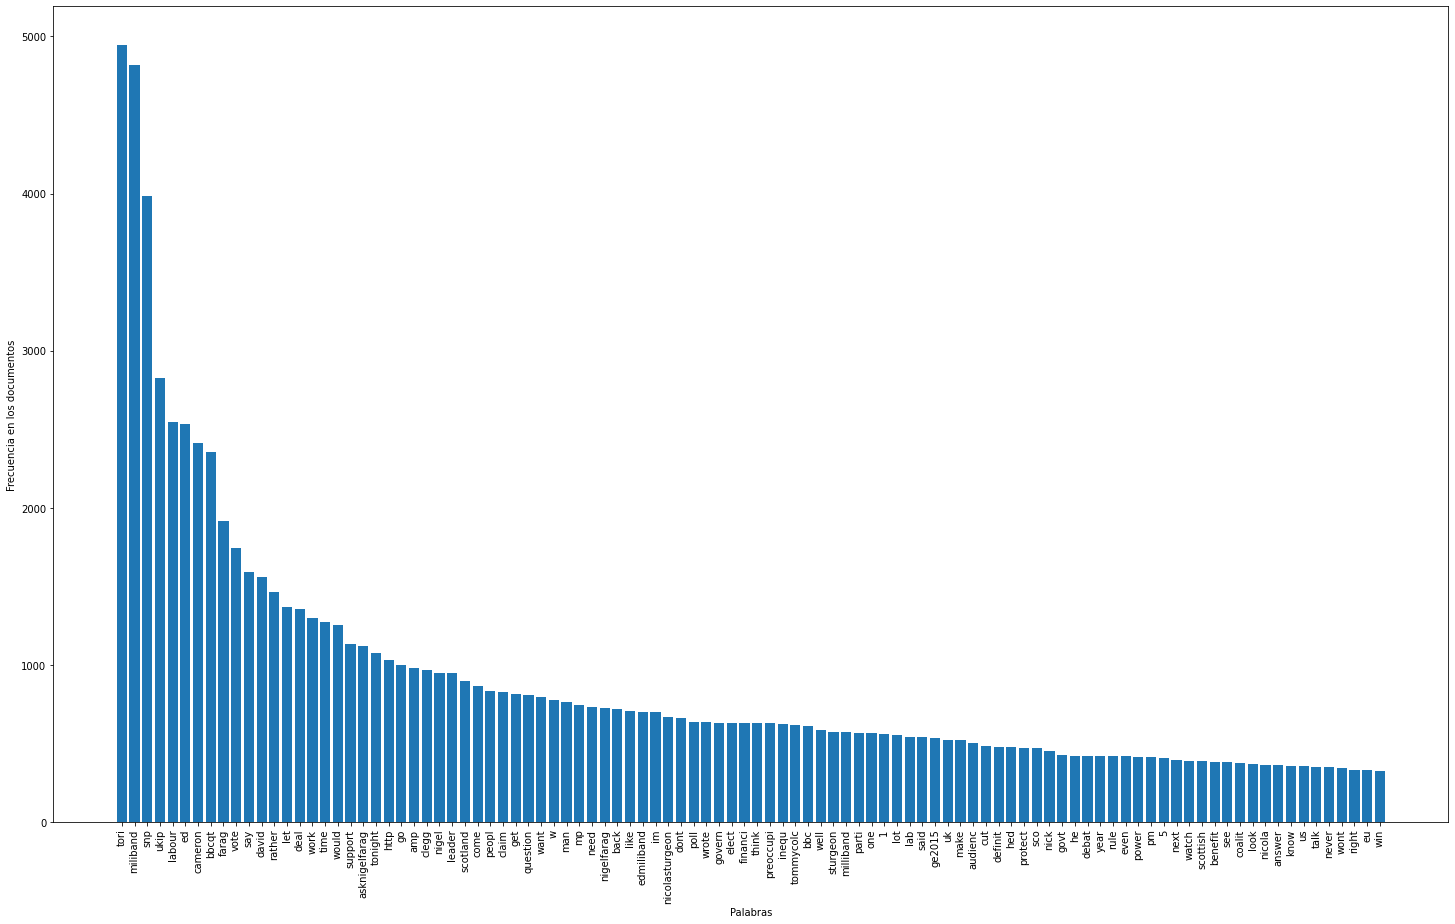

In [ ]:
palabra = [palabra[0] for palabra in rdd_palabras.collect()]
frecuencia = [ len(palabra[1]) for palabra in rdd_palabras.collect()]
plt.figure(figsize=(25, 15))
plt.bar(palabra[:100],frecuencia[:100])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia en los documentos')
plt.xticks(rotation =90)
plt.show()



#### Bigrama

In [ ]:
rdd_ngramas = rdd_tweetsPerron.map(lambda x: (x[0], Ngrama( x[1], 2 )))
rdd_palabrasBigrama = rdd_ngramas.map(lambda x: [(palabra, set([x[0]])) for palabra in x[1]]) \
                         .flatMap(lambda x: x) \
                         .reduceByKey(lambda a, b: a.union(b)) \
                         .sortBy(lambda x: len(x[1]), ascending = False)
print("{:<10} {:<10}".format('Bigrama', 'Numero de documentos'))
for x in rdd_palabrasBigrama.take(5): #nos devuelve en cuantas opiniones aparece cada palabra pertenece cada palabra 
  print(x[0],len(x[1]))

Bigrama    Numero de documentos
('ed', 'miliband') 1780
('david', 'cameron') 1524
('let', 'tori') 979
('nigel', 'farag') 792
('work', 'snp') 768


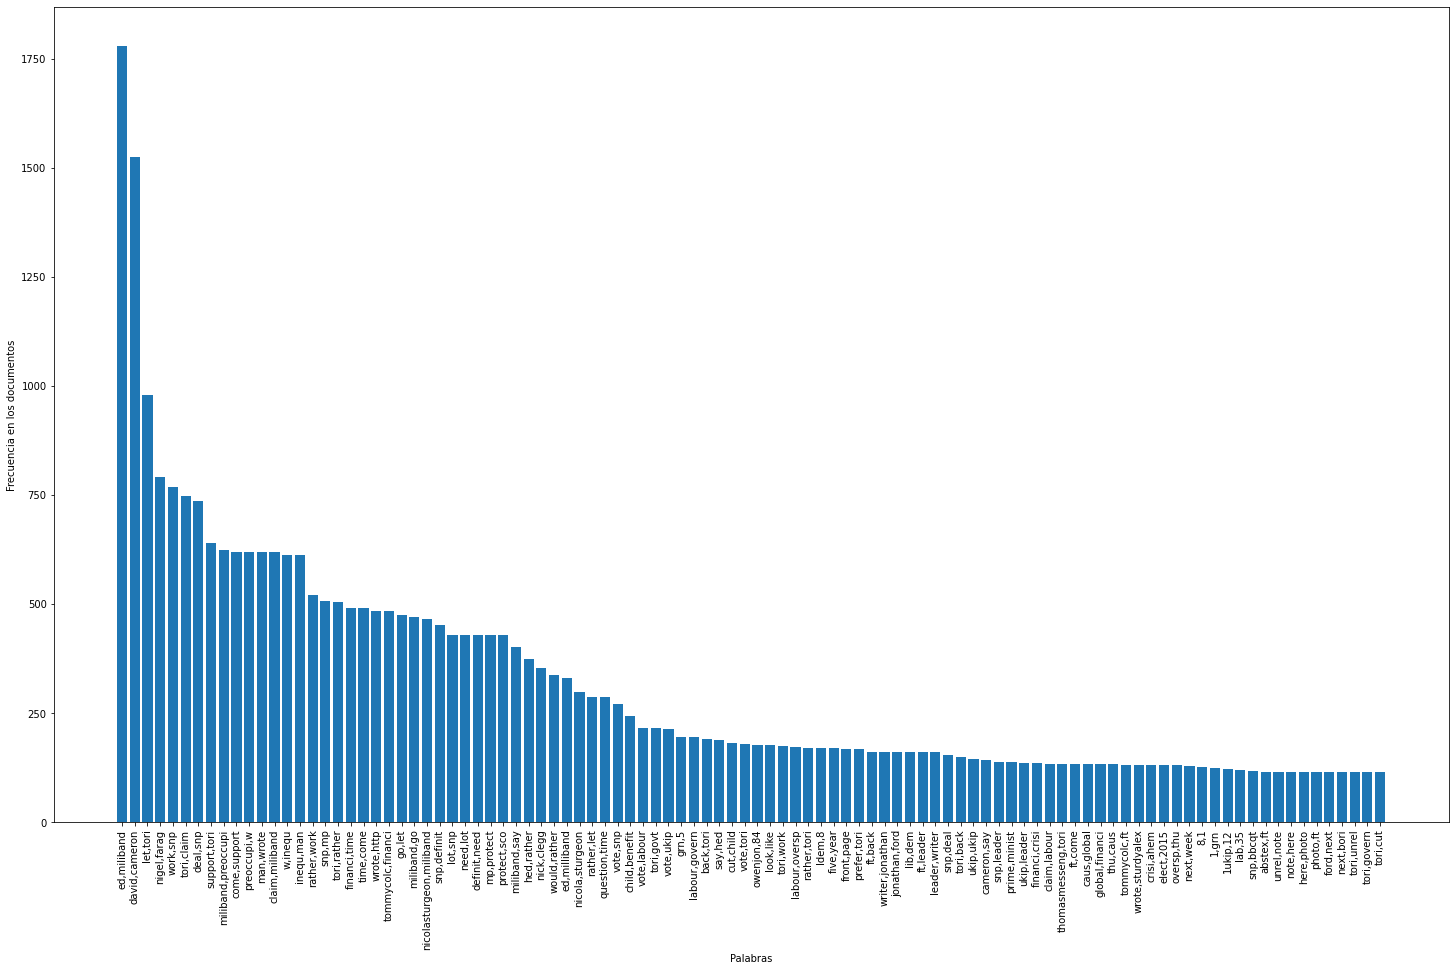

In [ ]:
palabra = [f'{palabra[0][0]},{palabra[0][1]}' for palabra in rdd_palabrasBigrama.collect()]
frecuencia = [ len(palabra[1]) for palabra in rdd_palabrasBigrama.collect()]
plt.figure(figsize=(25, 15))
plt.bar(palabra[:100],frecuencia[:100])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia en los documentos')
plt.xticks(rotation =90)
plt.show()

#### Trigrama

In [ ]:
rdd_ngramas = rdd_tweetsPerron.map(lambda x: (x[0], Ngrama( x[1],3 ) ) )

In [ ]:
rdd_palabrasTrigrama = rdd_ngramas.map(lambda x: [(palabra, set([x[0]])) for palabra in x[1]]) \
                         .flatMap(lambda x: x) \
                         .reduceByKey(lambda a, b: a.union(b)) \
                         .sortBy(lambda x: len(x[1]), ascending = False)

print("{:<10} {:<10}".format('Bigrama', 'Numero de documentos'))
for x in rdd_palabrasTrigrama.take(5): #nos devuelve en cuantas opiniones aparece cada palabra pertenece cada palabra 
  print(x[0],len(x[1]))

Bigrama    Numero de documentos
('come', 'support', 'tori') 620
('tori', 'claim', 'miliband') 619
('miliband', 'preoccupi', 'w') 619
('support', 'tori', 'claim') 619
('claim', 'miliband', 'preoccupi') 619


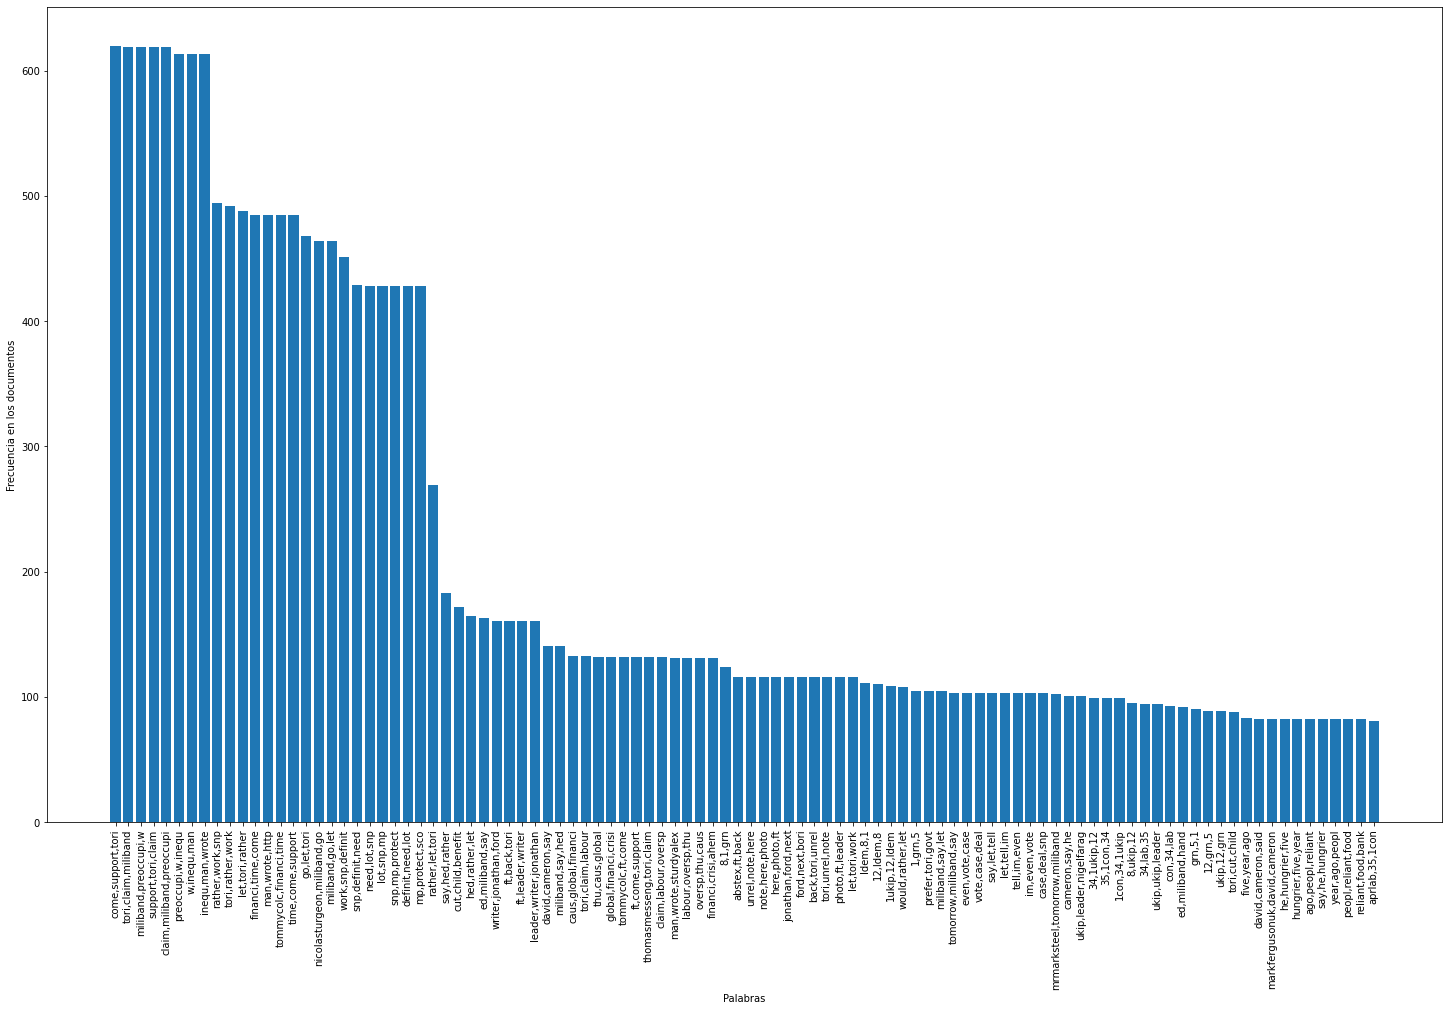

In [ ]:
palabra = [f'{palabra[0][0]},{palabra[0][1]},{palabra[0][2]}' for palabra in rdd_palabrasTrigrama.collect()]
frecuencia = [ len(palabra[1]) for palabra in rdd_palabrasTrigrama.collect()]
plt.figure(figsize=(25, 15))
plt.bar(palabra[:100],frecuencia[:100])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia en los documentos')
plt.xticks(rotation =90)
plt.show()

## Filtración de los Ngramas del 5%

#### Palabras

In [ ]:
rdd_pocos = rdd_palabras.filter(lambda x : len(x[1])>=1000)
print("{:<10} {:<10}".format('Palabra', 'Numero de documentos'))
for x in rdd_pocos.take(20): #nos devuelve en cuantas opiniones aparece cada palabra pertenece cada palabra 
  print(x[0],len(x[1]))


Bigrama    Numero de documentos
tori 4945
miliband 4819
snp 3981
ukip 2827
labour 2547
ed 2532
cameron 2410
bbcqt 2354
farag 1916
vote 1744
say 1587
david 1555
rather 1460
let 1365
deal 1353
work 1295
time 1272
would 1251
support 1134
asknigelfarag 1116


#### Bigrama

In [ ]:
rdd_pocos = rdd_palabrasBigrama.filter(lambda x : len(x[1])>=1000)
print("{:<10} {:<10}".format('Bigrama', 'Numero de documentos'))
for x in rdd_pocos.take(20): #nos devuelve en cuantas opiniones aparece cada palabra pertenece cada palabra 
  print(x[0],len(x[1]))

Bigrama    Numero de documentos
('ed', 'miliband') 1780
('david', 'cameron') 1524


#### Trigrama

In [ ]:
rdd_pocos = rdd_palabrasTrigrama.filter(lambda x : len(x[1])>=1000)
print("{:<10} {:<10}".format('Bigrama', 'Numero de documentos'))
for x in rdd_pocos.take(20): #nos devuelve en cuantas opiniones aparece cada palabra pertenece cada palabra 
  print(x[0],len(x[1]))

Bigrama    Numero de documentos


##Análisis de sentimiento

El procesamiento del lenguaje natural, o PNL, es un tipo de inteligencia artificial que se ocupa de analizar, comprender y generar lenguajes humanos naturales para que las computadoras puedan procesar el lenguaje humano escrito y hablado sin usar un lenguaje controlado por computadora. El procesamiento del lenguaje natural, a veces también llamado "lingüística computacional", utiliza tanto la semántica como la sintaxis para ayudar a las computadoras a comprender cómo los humanos hablan o escriben y cómo derivar el significado de lo que dicen. Este campo combina el poder de la inteligencia artificial y la programación de computadoras en una comprensión tan poderosa que los programas pueden incluso traducir un idioma a otro con razonable precisión. Este campo también incluye el reconocimiento de voz, la capacidad de una computadora para comprender lo que usted dice lo suficientemente bien como para responder adecuadamente.

El análisis de sentimiento es una técnica del procesamiento de lenguaje natural, en la cual se determina si los datos, usualmente texto, tienen sentido positivo, negativo o neutral. 

Esta técnica es muy usada en la industria para percibir el sentimiento de satisfacción de sus clientes, ya sea que estos perciban sus productos de buena calidad, regular o mala.

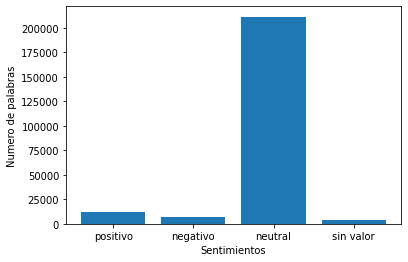

In [ ]:
def sentimiento(palabra):
  score=analyzer.polarity_scores(palabra)
  if score["pos"] >= 0.5:
    return 'positivo'
  elif score["neg"] >= 0.5:
    return 'negativo'
  elif score["neu"] >=0.5:
    return 'neutral'
  else:
    return 'sin valor'

histograma_sentimientos = rdd_tweetsPerron.flatMap(lambda x: x[1]) \
                                    .map(lambda x: (sentimiento(x), 1)) \
                                    .reduceByKey(lambda a, b: a + b) \
                                    .collect()

sentimientos = [ sentimiento for (sentimiento, _) in histograma_sentimientos ]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_sentimientos ]
plt.bar(sentimientos, frecuencias)
plt.xlabel('Sentimientos')
plt.ylabel('Numero de palabras')
plt.show()

Sin duda tenemos una gráfica bastante rara a primera vista. Tenemos dos teorías para justificar tal comportamiento:

A) Respecto a los datos: Sabemos que los usuarios de Twitter tienden a subir de tono sus publicaciones pero por obvias razones la librería NLTK filtró algunos tweets para quedarse con una muestra menos "agresiva", es por eso que obtenemos un histograma como el de arriba.

B) Respecto a la semántica: Como estamos obteniendo el sentimiento por palabra y NO por tweet, entonces de alguna manera estamos rompiendo la semántica de los mismos, así en los tweets completos solo necesitamos de un par de palabras negativas para clasificar al tweet como negativo, pero al romper los tweets en palabras se pierde el sentido grupal que tienen las mismas.

In [ ]:
tweets_positivos = nltk.corpus.twitter_samples.strings('positive_tweets.json')
tweets_negativos = nltk.corpus.twitter_samples.strings('negative_tweets.json')


In [ ]:
procesado_pos=list(map(process_tweet,tweets_positivos))
procesado_pos

[['followfriday',
  'franceint',
  'pkuchli',
  '57',
  'milipolpari',
  'top',
  'engag',
  'member',
  'commun',
  'week'],
 ['lamb',
  '2ja',
  'hey',
  'jame',
  'odd',
  'pleas',
  'call',
  'contact',
  'centr',
  '02392441234',
  'abl',
  'assist',
  'mani',
  'thank'],
 ['despiteoffici',
  'listen',
  'last',
  'night',
  'bleed',
  'amaz',
  'track',
  'scotland'],
 ['97side', 'congrat'],
 ['yeaaah',
  'yipppi',
  'accnt',
  'verifi',
  'rqst',
  'succeed',
  'got',
  'blue',
  'tick',
  'mark',
  'fb',
  'profil',
  '15',
  'day'],
 ['bhaktisbant', 'pallaviruhail', 'one', 'irresist', 'flipkartfashionfriday'],
 ['dont',
  'like',
  'keep',
  'love',
  'custom',
  'wait',
  'long',
  'hope',
  'enjoy',
  'happi',
  'friday',
  'lwwf'],
 ['impatientraid',
  'second',
  'thought',
  'there',
  'enough',
  'time',
  'dd',
  'new',
  'short',
  'enter',
  'system',
  'sheep',
  'must',
  'buy'],
 ['jgh', 'go', 'bayan', 'bye'],
 ['act',
  'mischiev',
  'call',
  'etl',
  'layer',
  

In [ ]:
procesado_neg=list(map(process_tweet,tweets_negativos))
procesado_neg

[['hopeless', 'tmr'],
 ['everyth',
  'kid',
  'section',
  'ikea',
  'cute',
  'shame',
  'im',
  'nearli',
  '19',
  '2',
  'month'],
 ['hegelbon', 'heart', 'slide', 'wast', 'basket'],
 ['ketchburn', 'hate', 'japanes', 'call', 'bani'],
 ['dang', 'start', 'next', 'week', 'work'],
 ['oh', 'god', 'babi', 'face'],
 ['rileymcdonough', 'make', 'smile'],
 ['f0ggstar',
  'stuartthul',
  'work',
  'neighbour',
  'motor',
  'ask',
  'said',
  'hate',
  'updat',
  'search'],
 ['whytahuodyy', 'sialan'],
 ['athabasca',
  'glacier',
  '1948',
  'athabasca',
  'glacier',
  'jasper',
  'jaspernationalpark',
  'alberta',
  'explorealberta'],
 ['realli', 'good', 'mampg', 'idea', 'im', 'never', 'go', 'meet'],
 ['rampageinthebox', 'mare', 'ivan'],
 ['sophiamascardo', 'happi', 'trip', 'keep', 'safe', 'see', 'soon'],
 ['im', 'tire', 'hahahah'],
 ['grumpycockney', 'knee', 'replac', 'get', 'amp', 'day', 'ouch'],
 ['relat',
  'sweet',
  'n',
  'sour',
  'kind',
  'bipolar',
  'peopl',
  'life',
  'cuz',
  'li

In [ ]:
rdd_tweets_pos = spark.sparkContext.parallelize(procesado_pos)
i=0
def indice(x):
  global i
  i+=1
  return (i,x)
rdd_tweets_positivo=rdd_tweets_pos.map(lambda x: indice(x))

In [ ]:
rdd_tweets_neg = spark.sparkContext.parallelize(procesado_neg)
i=0
def indice(x):
  global i
  i+=1
  return (i,x)
rdd_tweets_negativo=rdd_tweets_neg.map(lambda x: indice(x))

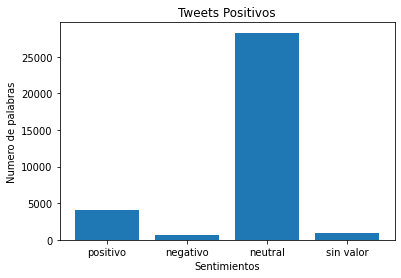

In [ ]:
def sentimiento(palabra):
  score=analyzer.polarity_scores(palabra)
  if score["pos"] >= 0.5:
    return 'positivo'
  elif score["neg"] >= 0.5:
    return 'negativo'
  elif score["neu"] >=0.5:
    return 'neutral'
  else:
    return 'sin valor'

histograma_sentimientos = rdd_tweets_positivo.flatMap(lambda x: x[1]) \
                                    .map(lambda x: (sentimiento(x), 1)) \
                                    .reduceByKey(lambda a, b: a + b) \
                                    .collect()

sentimientos = [ sentimiento for (sentimiento, _) in histograma_sentimientos ]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_sentimientos ]
plt.bar(sentimientos, frecuencias)
plt.xlabel('Sentimientos')
plt.title('Tweets Positivos')
plt.ylabel('Numero de palabras')
plt.show()

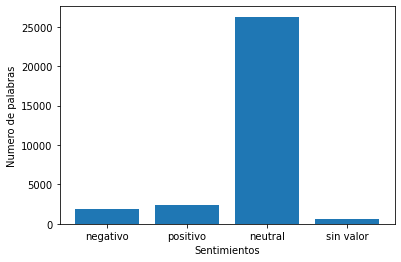

In [ ]:
def sentimiento(palabra):
  score=analyzer.polarity_scores(palabra)
  if score["pos"] >= 0.5:
    return 'positivo'
  elif score["neg"] >= 0.5:
    return 'negativo'
  elif score["neu"] >=0.5:
    return 'neutral'
  else:
    return 'sin valor'

histograma_sentimientos = rdd_tweets_negativo.flatMap(lambda x: x[1]) \
                                    .map(lambda x: (sentimiento(x), 1)) \
                                    .reduceByKey(lambda a, b: a + b) \
                                    .collect()

sentimientos = [ sentimiento for (sentimiento, _) in histograma_sentimientos ]
frecuencias = [ frecuencia for (_, frecuencia) in histograma_sentimientos ]
plt.bar(sentimientos, frecuencias)
plt.xlabel('Sentimientos')
plt.title('Tweets Negativos')
plt.ylabel('Numero de palabras')
plt.show()